* **PREPARE A COMPLETE DATA ANALYSIS REPORT ON THE GIVEN DATA**
* **CREATE A MODEL WHICH CAN CLASSIFY THE THREE MAJOR ATTACKING DISEASES OF RICE PLANTS LIKE LEAF BLAST, BACTERIAL BLIGHT AND BROWN SPOT**
* **ANALYZE VARIOUS TECHNIQUES LIKE DATA AUGMENTATION, ETC AND CREATE A REPORT ON THAT**.

In [ ]:
#impoting necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import warnings
from keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')
import numpy as np
import keras
%matplotlib inline
import random
import os
from PIL import Image
import cv2
import warnings
warnings.filterwarnings('ignore')
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [72]:
#path for loading data
data_path =(r"C:\Users\sachi\Data")

In [73]:
#The pathlib is a Python module which provides an object API for working with files and directories.
import pathlib
data_path=pathlib.Path(data_path)
data_path

WindowsPath('C:/Users/sachi/Data')

In [74]:
# glob () to Search Files,in our data there are 3 files of 3 disease
disease_label_images_dict = {#searching and store it in dictionary
    'leaf_smut': list(data_path.glob('*smut/*')),
    'brown_spot': list(data_path.glob('Brown*/*')),
    'bacterial_leaf_blight': list(data_path.glob('Bacterial*/*')),
}

## Exploratory Data Analysis

In [75]:
# Creating labels dictionary for creating y variable 
disease_label = {
    'leaf_smut': 0,
    'brown_spot': 1,
    'bacterial_leaf_blight': 2,
}

**RICE LEAF DISEASES**

* Agriculture is the primary source of income and livelihood in a number of countries,In india almost 70% people depends on agriculture sector..Out of this 70% people,40% of th epeople are engaged in rice production...There are number of diseases that affect the quality and growth of the crop..If not resolved in time,it will considerably affect the production..An automated system is very helpful to find the disease at the right time which will help the farmers to prevent the crop from damage in an earlier stage.Convolutional Neural Network (CNN) models can be very beneficial in such problems.
* The major rice leaf diseasea are Leaf smut disease,Brown spot and Bacterial leaf blight

**Leaf smut disease**

* What causes rice leaf smut is a fungus called Entyloma oryzae. Fortunately for your garden, if you see its signs, this infection is usually minor. It is widespread where rice is grown, but leaf smut doesn’t often cause serious damage. However, leaf smut can make your rice vulnerable to other diseases, and ultimately this can cause a yield reduction.


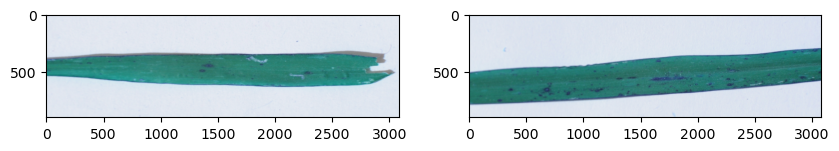

In [6]:
#visualising the leaf smut diseased images

import glob
import matplotlib.pyplot as plt
file=r"C:\Users\sachi\Data\Leaf smut\*.JPG"
images=[cv2.imread(image) for image in glob.glob(file)]
# 2*2 image
r=1
cl=2
j=0
fig=plt.figure(figsize=(10,7))
for j in range(0,r*cl):
    fig.add_subplot(r,cl,j+1)
    plt.imshow(images[j])
  

* leaf smut is the **presence of small black spots** on the leaves. They are slightly raised and angular and give the leaves the appearance of having been sprinkled with ground pepper. Coverage by these spots is most complete on the oldest leaves. The tips of some leaves with the most infection may die...


**Brown spot**

* Brown spot has been historically largely ignored as one of the most common and most damaging rice diseases.Its most observable damage is the **numerous big spots on the leaves** which can kill the whole leaf. When infection occurs in the seed, unfilled grains or spotted or discolored seeds are formed.



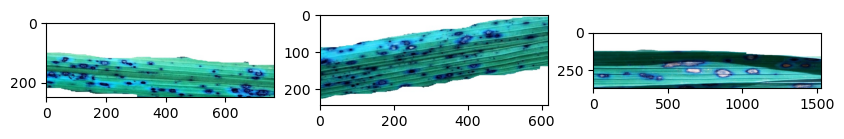

In [58]:
#visualising the Brown spot diseased images

import glob
import matplotlib.pyplot as plt
file=r"C:\Users\sachi\Data\Brown spot\*.JPG"
images=[cv2.imread(image) for image in glob.glob(file)]
# 2*2 image
r=1
cl=3
j=0
fig=plt.figure(figsize=(10,7))
for j in range(0,r*cl):
    fig.add_subplot(r,cl,j+1)
    plt.imshow(images[j])
  

* Infected seedlings have **small, circular, yellow brown or brown lesions** that may girdle the coleoptile and distort primary and secondary leaves.These brown spots are **5−14 mm long which can cause leaves to wilt**. On resistant varieties, the lesions are brown and **pinhead-sized**.

**Bacterial leaf blight**

* Bacterial blight of rice is one of the deadliest diseases for rice which occur in both tropical and temperate climates where there are irrigated and rainfed lowlands.. Xanthomonas oryzae pv. Oryzae(type of virus) is the causal agent of the bacterial blight of rice. The disease occurs in areas with high numbers of weeds and can spread easily from one infected plant to another.

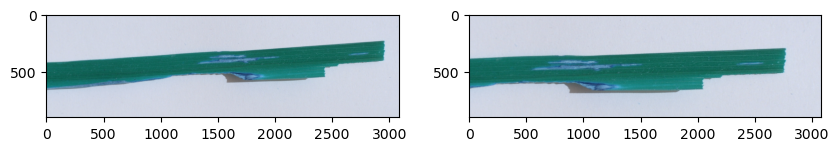

In [57]:
#visualising the Brown spot diseased images

import glob
import matplotlib.pyplot as plt
file=r"C:\Users\sachi\Data\Bacterial leaf blight\*.JPG"
images=[cv2.imread(image) for image in glob.glob(file)]
# 2*2 image
r=1
cl=2
j=0
fig=plt.figure(figsize=(10,7))
for j in range(0,r*cl):
    fig.add_subplot(r,cl,j+1)
    plt.imshow(images[j])

* In the beginning, infected **leaves turn greyish green and roll up**. As the disease progresses, the leaf turns yellow and then straw yellow and then slowly it dries up and dies..

**Identifying Class Imbalance**

In [12]:
# find the number of images assigned to each class and plot them in a bar chart to easily identify any imbalance.
# Imbalance in a CNN could result in poor performance for the class with less representation, impacting overall performance.

In [76]:
number_classes = {#Checking the number of images in each folder
"leaf_smut":(len(list(data_path.glob("leaf smut/*")))),
"Brown spot":(len(list(data_path.glob("Brown spot/*")))),
"bacterial_leaf_blight":(len(list(data_path.glob("bacterial leaf blight/*"))))
}

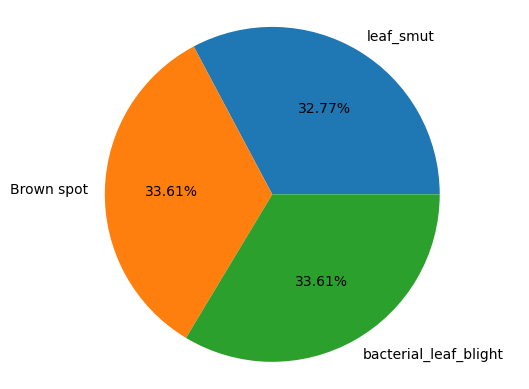

In [102]:
# Plot
plt.pie(values, labels=names,autopct='%.2f%%')
names=list(number_classes.keys())
values = list(number_classes.values())
plt.axis('equal')
plt.show()

In [15]:
number_classes

{'leaf_smut': 39, 'Brown spot': 40, 'bacterial_leaf_blight': 40}

* There is no such imbalance in our data

**Distinct difference of channels(RGB)of each disease**

In [16]:
#creating a function to see RGB variance in these images 
def color_hist_visualization(image_path, figsize=(16, 4)):
    plt.figure(figsize=figsize)
#for image loading we are using cv2    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.axis("off")
#defining the RGB colours    
    colors = ["red", "green", "blue"]
    for i in range(len(colors)):
        plt.subplot(1, 4, i + 2)
        plt.hist(
            img[:, :, i].reshape(-1),
            bins=25,
            alpha=0.5,
            color=colors[i],
            density=True
        )
        plt.xlim(0, 255)
        plt.xticks([])
        plt.yticks([])
    
    
    plt.show()

RBG-channel visualisation of Bacterial leaf blight


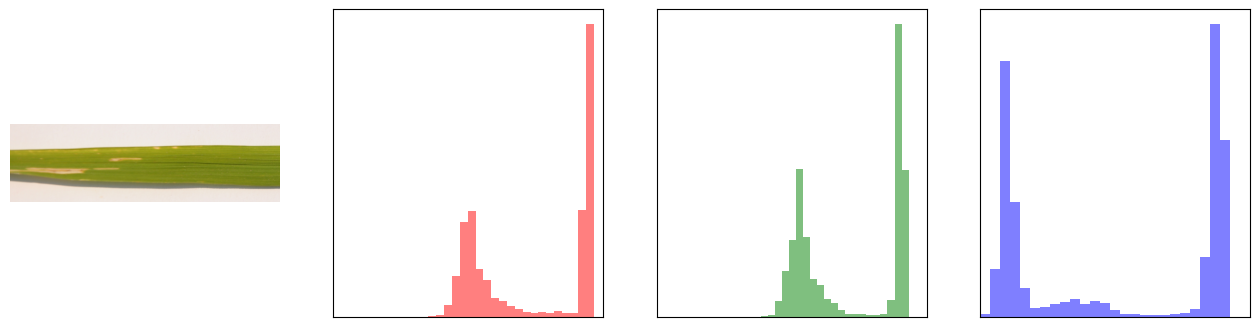

RBG-channel visualisation of Brown spot


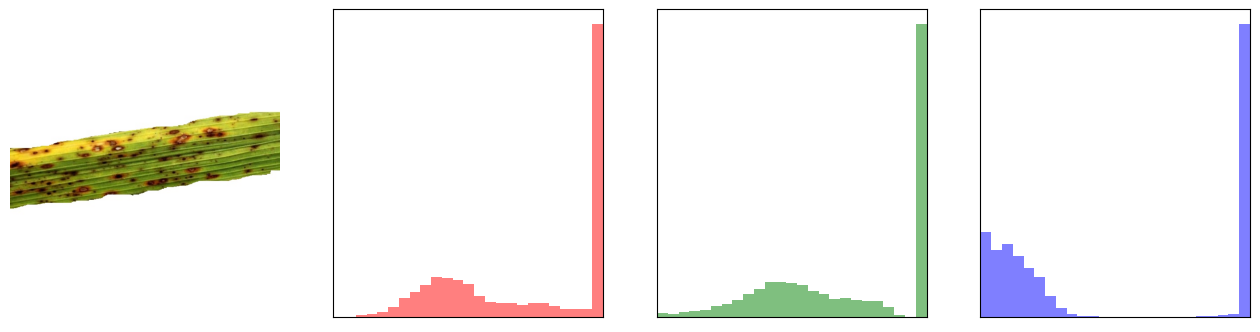

RBG-channel visualisation of Leaf smut


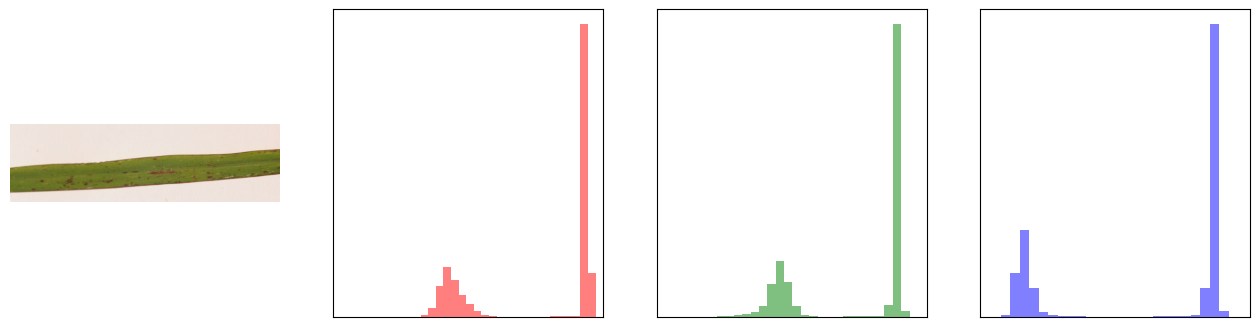

In [56]:
print("RBG-channel visualisation of Bacterial leaf blight")
color_hist_visualization(r"C:\Users\sachi\Data\Bacterial leaf blight\DSC_0392.JPG")
print("RBG-channel visualisation of Brown spot")
color_hist_visualization(r"C:\Users\sachi\Data\Brown spot\DSC_0101.jpg")
print("RBG-channel visualisation of Leaf smut")
color_hist_visualization(r"C:\Users\sachi\Data\Leaf smut\DSC_0308.JPG")

* histogram channel visualisation of each diseased image

**Image size**

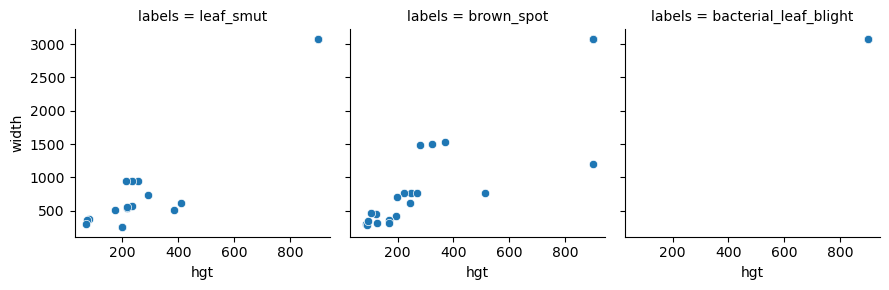

In [35]:
label = []
et = []
wt = []
for j in disease_label_images_dict.keys():
    for i in range(0,len(disease_label_images_dict[j])):
        im = PIL.Image.open(str(disease_label_images_dict[j][i]))
        arr = np.array(im)
        h,w,d = arr.shape
        label.append(j)
        et.append(h)
        wt.append(w)
x = pd.DataFrame(zip(label,et,wt),columns=['labels','hgt','width'])        
g = sns.FacetGrid(x, col="labels")
g.map(sns.scatterplot, "hgt", "width")

* There is size difference difference in images,leaf smut and brown diseased iamges are similar in size..


## DATA PREPROCESSING

In [20]:
# Images loading using openCV
X, y = [], []
i=0
for label2,images in disease_label_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(disease_label[label2])

In [21]:
#converting into numpy array
X = np.array(X)
y = np.array(y)

**checking quality of input images**

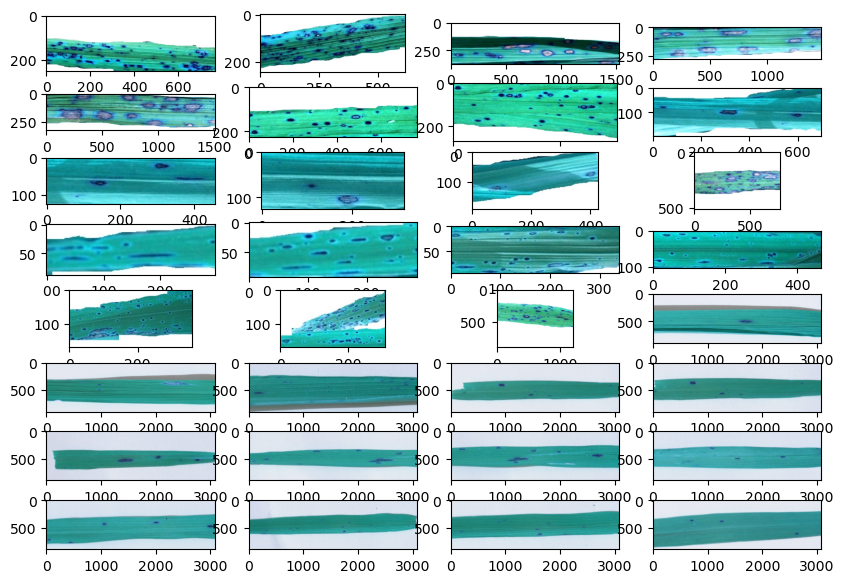

In [8]:
import glob
#analysing quality of Brown spot diseased images
file=r"C:\Users\sachi\Data\Brown spot\*.JPG"
images2=[cv2.imread(image) for image in glob.glob(file)]
# 2*2 image
r=8
cl=4
j=0
fig=plt.figure(figsize=(10,7))
for j in range(0,r*cl):
    fig.add_subplot(r,cl,j+1)
    plt.imshow(images2[j])

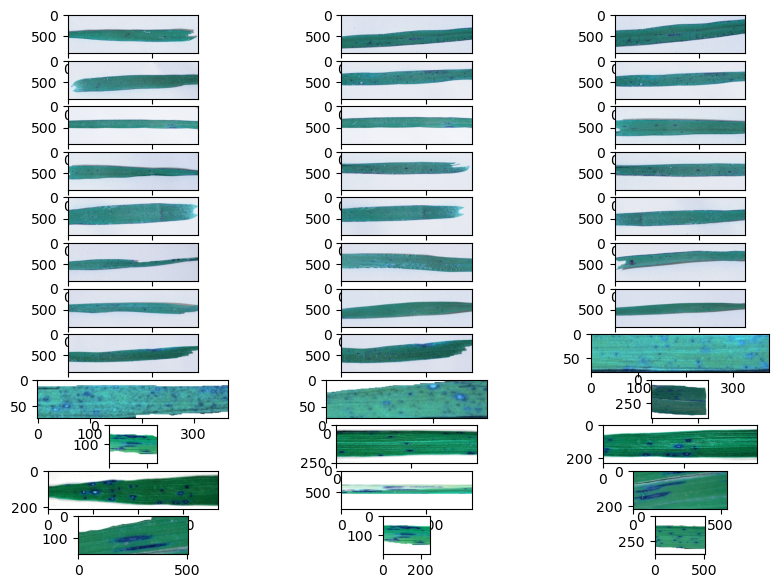

In [9]:
#analysing quality of Leaf smut diseased images
file=r"C:\Users\sachi\Data\Leaf smut\*.JPG"
images3=[cv2.imread(image) for image in glob.glob(file)]
# 2*2 image
r=12
cl=3
j=0
fig=plt.figure(figsize=(10,7))
for j in range(0,r*cl):
    fig.add_subplot(r,cl,j+1)
    plt.imshow(images3[j])

* By analysis the image data of brown spot and leaf smut diseased images,it is seen that there is some similarities
between  brown spot and leaf smut diseased images..The appearance of brown spot diseased leafs is like small, circular, yellow brown or brown lesion which we can identify easily ,but when intensity of leaf smut disease increase the yellowish brown leisons 
will appear sometimes very simlar two brown spot disease

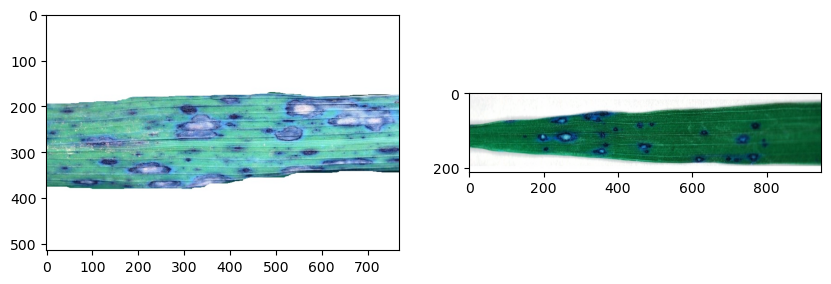

In [10]:
#visualising the similar image
file=r"C:\Users\sachi\41\*.JPG"
images4=[cv2.imread(image) for image in glob.glob(file)]
# 2*2 image
r=1
cl=2
j=0
fig=plt.figure(figsize=(10,7))
for j in range(0,r*cl):
    fig.add_subplot(r,cl,j+1)
    plt.imshow(images4[j])

* We can see that the similarity of leisons in brown spot and leaf smut disease..There are more simliar images in this dataset..The problem arises that the algorithm get confuse when we train these images..But expecting the CNN can identify the pattern and distinct feature of each images..

In [22]:
#splitting data for training,validation and testing(0.7 to train,0.3 to valid and test(equally))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15,stratify=y,random_state=30)
x_train, x_valid, Y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15,stratify=y_train)

In [65]:
print(x_train.shape)
print(x_valid.shape)
print(X_test.shape)
print(Y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(85, 180, 180, 3)
(16, 180, 180, 3)
(18, 180, 180, 3)
(85,)
(18,)
(16,)


In [24]:
# The reason for normalizing the images is to avoid the possibility of exploding gradients because of the high /
# range of the pixels [0, 255], and improve the convergence speed
X_train_scaled=x_train/255
X_valid_scaled=x_valid/255
X_test_scaled=X_test/255

## MODEL BUILDING

* CNN is a type of neural network model which allows us to extract higher representations for the image content. Unlike the classical image recognition where you define the image features yourself, CNN takes the image’s raw pixel data, trains the model, then extracts the features automatically for better classification.

In [25]:
#model creation using CNN model
num_classes = 3

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
ar=model.fit(X_train_scaled, Y_train, validation_data=(X_valid_scaled,y_valid),epochs=50)   

Epoch 1/50
3/3 [==============================] - 3s 648ms/step - loss: 1.5392 - accuracy: 0.3529 - val_loss: 2.6753 - val_accuracy: 0.3125
Epoch 2/50
3/3 [==============================] - 1s 471ms/step - loss: 1.7669 - accuracy: 0.3412 - val_loss: 1.0490 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 1s 476ms/step - loss: 0.9970 - accuracy: 0.5059 - val_loss: 1.0550 - val_accuracy: 0.3125
Epoch 4/50
3/3 [==============================] - 1s 409ms/step - loss: 0.9024 - accuracy: 0.6941 - val_loss: 0.9668 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 1s 407ms/step - loss: 0.7226 - accuracy: 0.6824 - val_loss: 1.1177 - val_accuracy: 0.4375
Epoch 6/50
3/3 [==============================] - 1s 425ms/step - loss: 0.7015 - accuracy: 0.6706 - val_loss: 0.9474 - val_accuracy: 0.5625
Epoch 7/50
3/3 [==============================] - 1s 406ms/step - loss: 0.6048 - accuracy: 0.7529 - val_loss: 0.9445 - val_accuracy: 0.5625
Epoch 8/50
3/3 [====

In [26]:
# get predictions on the test set
y_hat = model.predict(X_test_scaled)
y_hat_label = [np.argmax(i) for i in y_hat]
y_hat_label[:18]

1/1 [==============================] - 0s 142ms/step


[0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0]

In [27]:
# evaluate test accuracy
score = model.evaluate(X_test_scaled, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 66.6667%


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.50      0.33      0.40         6
           2       0.83      0.83      0.83         6

    accuracy                           0.67        18
   macro avg       0.65      0.67      0.65        18
weighted avg       0.65      0.67      0.65        18



<AxesSubplot:>

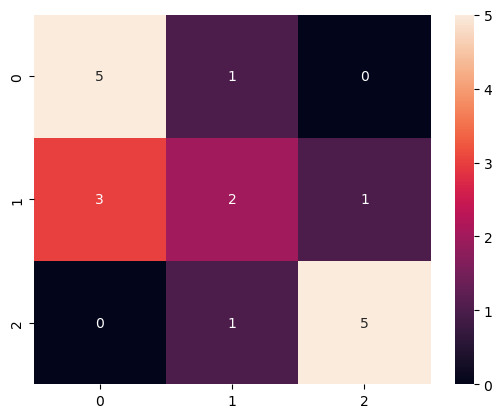

In [29]:

# Classification report and confusion matrics
print(classification_report(y_test,y_hat_label))
cf_matrix = confusion_matrix(y_test,y_hat_label)
sns.heatmap(cf_matrix, annot=True)

     

* The test accuracy that we got is 83% and our model which is good ..When we look into the confusion matrix one image of brown spot and bacterial leaf blight is wrongly classfied as leaf smut disease..
* Precision of class 0(leaf smut) is only 71% and for other class it is more than 80%
* When we look into the weighted F1 score of the model it got 84% which is also good

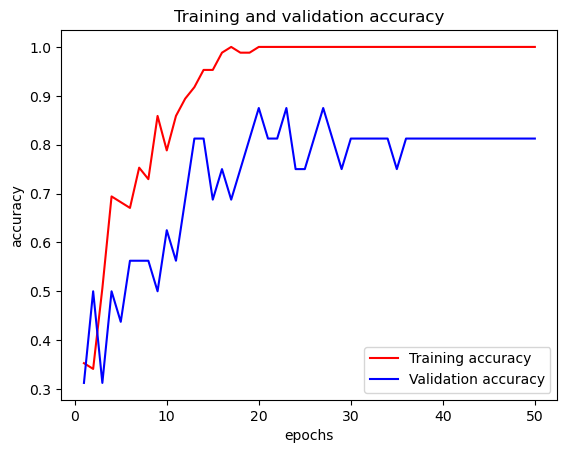

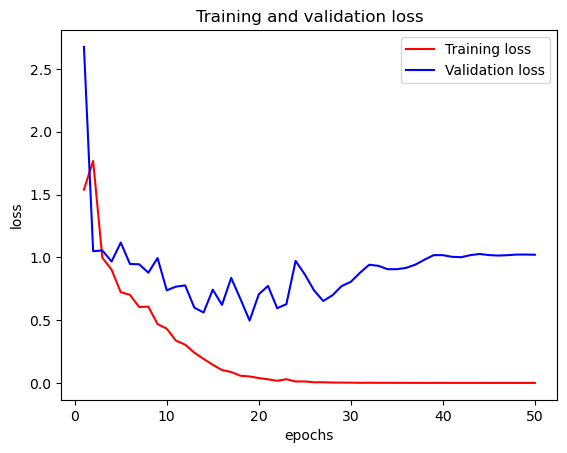

In [30]:
# Step:9 Plotting the training accuracy and validation accuracy
# Plotting the traning loss and validation loss
import matplotlib.pyplot as plt
accuracy = ar.history["accuracy"]
validation_accuracy = ar.history["val_accuracy"]
loss = ar.history["loss"]
validation_loss = ar.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

* This data overfitting is the problem here..When we look into accuracy graph it is clear that to a certain percentage accuracy of training data and validation accuracy is increasing after that validation accuracy is decreasing

### DATA AUGMENTATION USING IMAGE GENERATOR

* Data augmentation is the addition of new data artificially derived from existing training data. Techniques include resizing, flipping, rotating, cropping, padding, etc. It helps to address issues like overfitting and data scarcity by creating more variety in the data., and it makes the model robust with better performance.

In [31]:
import itertools
# Generating augmented images using ImageDataGenerator in Keras
augment = ImageDataGenerator(
    rotation_range=45,# randomly rotate images in the range (degrees, 0 to 180)
    horizontal_flip=True, # randomly flip images
    width_shift_range=0.2, # randomly shift images horizontally (fraction of total width
    height_shift_range=0.2,# randomly shift images vertically (fraction of total height)
    shear_range=0.2,# transformation where the image is skewed
    vertical_flip=True, # randomly flip images
    fill_mode='nearest'#points outside the boundaries are filled according to the given mode ('nearest')
)

leaf_smut = list(itertools.chain(*np.where(Y_train == 0)))
brown_spot = list(itertools.chain(*np.where(Y_train == 1)))
bacterail = list(itertools.chain(*np.where(Y_train == 2)))

# creating paths for each label to store files in each label
location_1 = r"C:\Users\sachi\augmented\0"
location_2 = r"C:\Users\sachi\augmented\1"
location_3 = r"C:\Users\sachi\augmented\2"

# Creating function to augment the data
def image_generator(label,path):
  for i in label:
    augmented = 0
    for batch in augment.flow(x_train[i].reshape((1,) + x_train[i].shape), batch_size=1,save_to_dir=path, save_prefix='augmented', save_format='JPG'):
      augmented += 1
      if augmented >= 12: #12 augmented images are created from each image
        break 
  print("Augmented Images generated in {} folder".format(path))

In [ ]:
#applying the function and saving to the defined path
image_generator(leaf_smut,location_1)
image_generator(brown_spot,location_2)
image_generator(bacterail,location_3)

In [32]:
data_path_aug =(r"C:\Users\sachi\augmented")

In [33]:
import pathlib
data_path_aug=pathlib.Path(data_path_aug)
data_path_aug

WindowsPath('C:/Users/sachi/augmented')

In [34]:
print(len(list(data_path_aug.glob('*0/*'))))
print(len(list(data_path_aug.glob('*1/*'))))
print(len(list(data_path_aug.glob('*2/*'))))

329
344
332


In [35]:
aug_dict={"0":list(data_path_aug.glob("0/*")),"1":list(data_path_aug.glob("1/*")),"2":list(data_path_aug.glob("2/*"))}

In [36]:
# Creating labels dictionary for creating y variable 
labels_dict = {
    '0': 0,
    '1': 1,
    '2': 2,
}

In [37]:
#augemeted image and labels storingg in A and B
A, B = [], []
i=0
for rice_leaf_disease,images in aug_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))#resizing
        A.append(resized_img)
        B.append(labels_dict[rice_leaf_disease])

In [38]:
#converting to numpy array
A = np.array(A)
B = np.array(B)

In [39]:
#cheking shape
A.shape

(1005, 180, 180, 3)

In [40]:
#concatenating both x_train and augmented image and label
X_train_augmented = np.concatenate([x_train,A])
y_train_augmented = np.concatenate([Y_train,B])

In [41]:
#normalising 
X_train_augmented = X_train_augmented / 255

In [42]:
X_train_augmented.shape

(1090, 180, 180, 3)

**HYPERPARAMETER TUNING**

In [43]:
num_classes = 3
def build_model(hp):
    model1= keras.Sequential([
        keras.layers.Conv2D(
            filters=hp.Int('Conv_1_filter',min_value=16,max_value=64,step=16),
            kernel_size=hp.Choice("conv_1_filter",values=[2,5]),
            activation="relu",padding="same", 
            input_shape=(180,180,3)
            ), 
        layers.MaxPooling2D(
        pool_size=hp.Choice('max_pool_size_1', values = [2,3,4,5])
        ),
        keras.layers.Conv2D(
            filters=hp.Int('Conv_2_filter',min_value=64,max_value=128,step=16),
            kernel_size=hp.Choice("conv_1_filter",values=[2,5]),
            activation="relu",padding="same"
            ),
        layers.MaxPooling2D(
        pool_size=hp.Choice('max_pool_size_1', values = [2,3,4,5])
        ),
         keras.layers.Conv2D(
            filters=hp.Int('Conv_3_filter',min_value=128,max_value=256,step=16),
            kernel_size=hp.Choice("conv_1_filter",values=[2,5]),
            activation="relu",padding="same"
             ),
        layers.MaxPooling2D(
        pool_size=hp.Choice('max_pool_size_1', values = [2,3,4,5])
        ),
         layers.Dropout(
        rate= hp.Choice('dropout_2', values = [0.1,0.2,0.3,0.4,0.5])
              ),
        keras.layers.Flatten(),
        keras.layers.Dense(
             units=hp.Int("dense_1_units",min_value=32,max_value=128,step=16),
             activation="relu"
        ),
        keras.layers.Dense(10,activation="softmax")
    ])
    model1.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(hp.Choice("learning_rate",
                                                                                                    values=[1e-2,1e-3])),
                                                                                                    metrics=['accuracy'])
    return model1

In [44]:
#We are using random search in keras tuner
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [47]:
tuner1=RandomSearch(build_model,
                  objective="val_accuracy",max_trials=6,directory=r"C:\Users\sachi\New folder\M")

In [48]:
tuner1.search(X_train_augmented,y_train_augmented,epochs=40,validation_data=(X_valid_scaled,y_valid))

Trial 6 Complete [00h 13m 03s]
val_accuracy: 0.9375

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 54m 00s
INFO:tensorflow:Oracle triggered exit


In [50]:
model2=tuner1.get_best_models(num_models=1)[0]

In [51]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 45, 45, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
er=model2.fit(X_train_augmented, y_train_augmented, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])

In [61]:
# evaluate test accuracy
score = er.(X_test_scaled, y_test) 
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)

1/1 [==============================] - 0s 135ms/step - loss: 0.2998 - accuracy: 0.9444
Test accuracy: 94.4444%


In [62]:
y_hat2 = model2.predict(X_test_scaled)
# get predictions on the test set
y_pred_class = [np.argmax(i) for i in y_hat2]
y_pred_class[:18]

1/1 [==============================] - 0s 98ms/step


[0, 0, 0, 2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 1]

## MODEL REPORT

**Classification report  and confusion matrix after augmentation and hyperparameter tuning**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.86      1.00      0.92         6
           2       1.00      0.83      0.91         6

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



<AxesSubplot:>

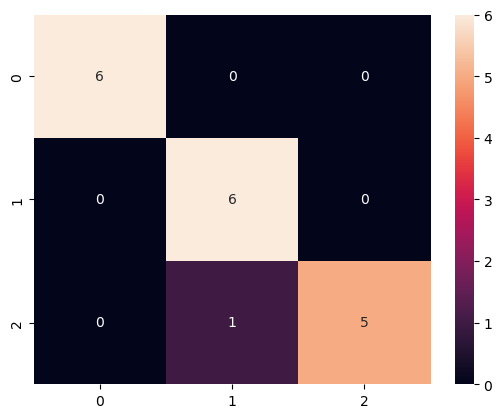

In [63]:

print(classification_report(y_test,y_pred_class))
cf_matrix2 = confusion_matrix(y_test,y_pred_class)
sns.heatmap(cf_matrix2, annot=True)


* After data augmentation and Hyper paramter tuning,the model accuracy improved from 67% to 94% and it is considered as a better model for detecting the rice leaf disease..
* Precision and recall is increased ,there is only one misclassification that is bacterial leaf blight disease wrongly classified as brown spot

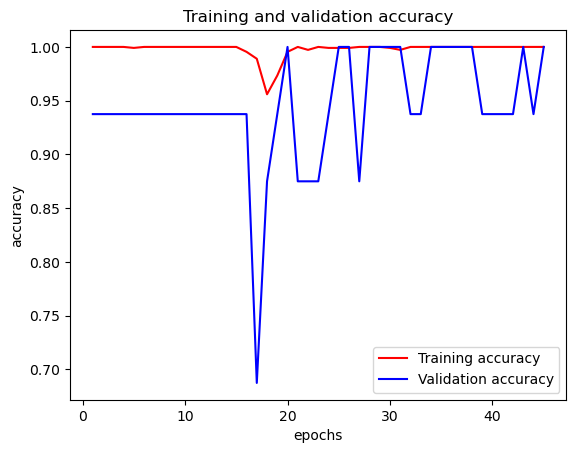

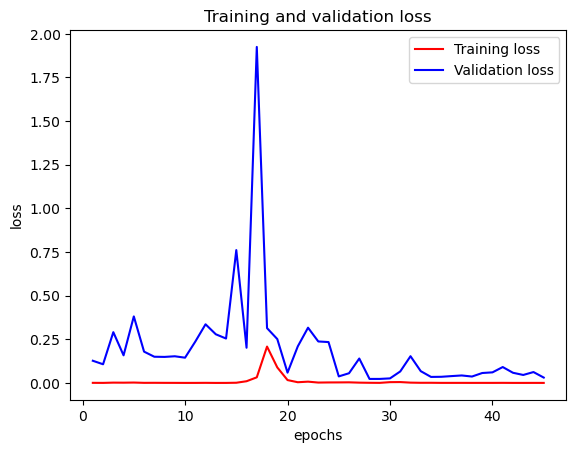

In [69]:
# Plotting the training accuracy and validation accuracy after augmentation and hyperparameter tuning
accuracy = er.history["accuracy"]
validation_accuracy = er.history["val_accuracy"]
loss = er.history["loss"]
validation_loss = er.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
# Plotting the traning loss and validation loss after augmentation and hyperparameter tuning
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

**CNN MODEL PERFORMANCE**

**Test results before and after data augmentation and hyper parameter tuning**

In [4]:
re={
    "score B/A":["Before Aug and Tun","After Aug and Tun"],
    "loss":[0.0003,0.0001],
    "validation_accuracy":[81,100],
    "validation_loss":[0.9,0.4],
    "Test_accuracy" : [66.6,95]
    }
df = pd.DataFrame(re)
df

,score B/A,loss,validation_accuracy,validation_loss,Test_accuracy
0,Before Aug and Tun,0.0003,81,0.9,66.6
1,After Aug and Tun,0.0001,100,0.4,95.0


*  CNN is a feedforward multilayered hierarchical network in which each layer conducts several transformations using a bank of convolutional kernels. The convolution procedure aids in the extraction of valuable characteristics from data points that are spatially connected.
* We implemented a custom 10 layer model for the recognition of rice leaf disease..And it include 3 convolution layers followed by 3 max pooling layers,2 dense layers and one output layer.. In this 3 convolutional layers we include several combination of filters to see how well the image assembles to the ﬁlter..pooling also pays a vital role in reducing varianceand computation complexity, resulting in fewer parameters to learn. it summarizes the feature thatappears in a portion of the feature map generated by the convolution layer.The output layer applies the softmax activation function which exponentially normalizes the dense layer..
* At the base model building with 50 epochs,after 35 epchos it overfits and main reason we observed that is insufficient training data for learning 
* We implemented augmentation technique and genrated more than 800 images using image genrator,we traained by finding best paramters using Random search in keras tuner
* After augmentation of data we searched for the best paramters using Random search in keras tuner
* We got a valuation accuracy 100% with a minimal loss of 0.2 and got a test accuracy of 94% with 0.2 loss
* To further evaluate the performance of our model, we also consider the metrics such as accuracy, precision, recall and F1 score of each rice leaf disease class,we got good precision and recall in all the disease class,but recall of class was 83% which we need to consider..
* We got an **accuracy of 94%** and it is the best model for predicting the rice leaf disease correctly
* There is only one misclassifcation in class 2 that is misclassified as class 1..The reason for this misclassification is abasense of quality and insufficient data points...Augmented images are created out of existing 85 actual images,but we need more actual images of each disease and thus we can train the model very well..Despite having better accuracy, we aim to improve the reliability and robustness of our model on diﬀerent datasets from other regions.


**DATA AUGMENTATION AND HYPERPARAMETER TUNING IMPACT**

* **Data Augmentation**- Fewer amount of training data is a major bottleneck for developing an eﬀective deep learning models including CNN-based models for
rice leaf disease detection. To ensure the robustness of the neural network based model, we need bigger amount of data to expand the functional diversity of the model.
* We implemented data augmentation techniques and created around 800 images from  85 training images
* To augment data with image rotations, we rotate the images by 45 ◦, respectively.We also apply ﬂipping and shifting (horizontal and vertical) . Finally, shear range and fill mode is applied in augmenting rice leaf disease images. To implement the above data augmentation techniques we adopt OpenCV library and created iamges using Imagegenerator..
* Data augmentation helps to reduced overfitting issue of the data and bring a positive impact on model building
* **Hyperparamter Tuning**- We used sparse category cross_entropy as the loss function and optimizer adam(is a stochastic gradient descent method) which is computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters..
* We run our model for maximum 6 trails and each trails include 40 epochs,The best tuned epoch is 30 in the fifth trail, as there are no further improvements in training and validation accuraciesfound for our model. it is shown that the validation and training loss also reduced to a  minimu as expected
* There are three convolution layers, Convolution 1,2 and 3 and we used 16,32 64 and in the 3rd convolution layers it is 256 which is maxmimum
* We used 3 maxpooling layers followed by each convolution layers between the range of 2 and 5 and the best result we got it from 2*2 pooling size
* We used relu as the activation function and softmax for the output layer
* Diﬀerent dropout rates 0.1 to 0.5 are experimented in the dense layer(s) of our CNN-based model.We ﬁnd that our model showcases higher training accuracies incomparison to validation accuracies for dropout rates less than 0.3 and dropoutrates greater than 0.4% (data overﬁtting)

**Visualising the Actual vs prediction**

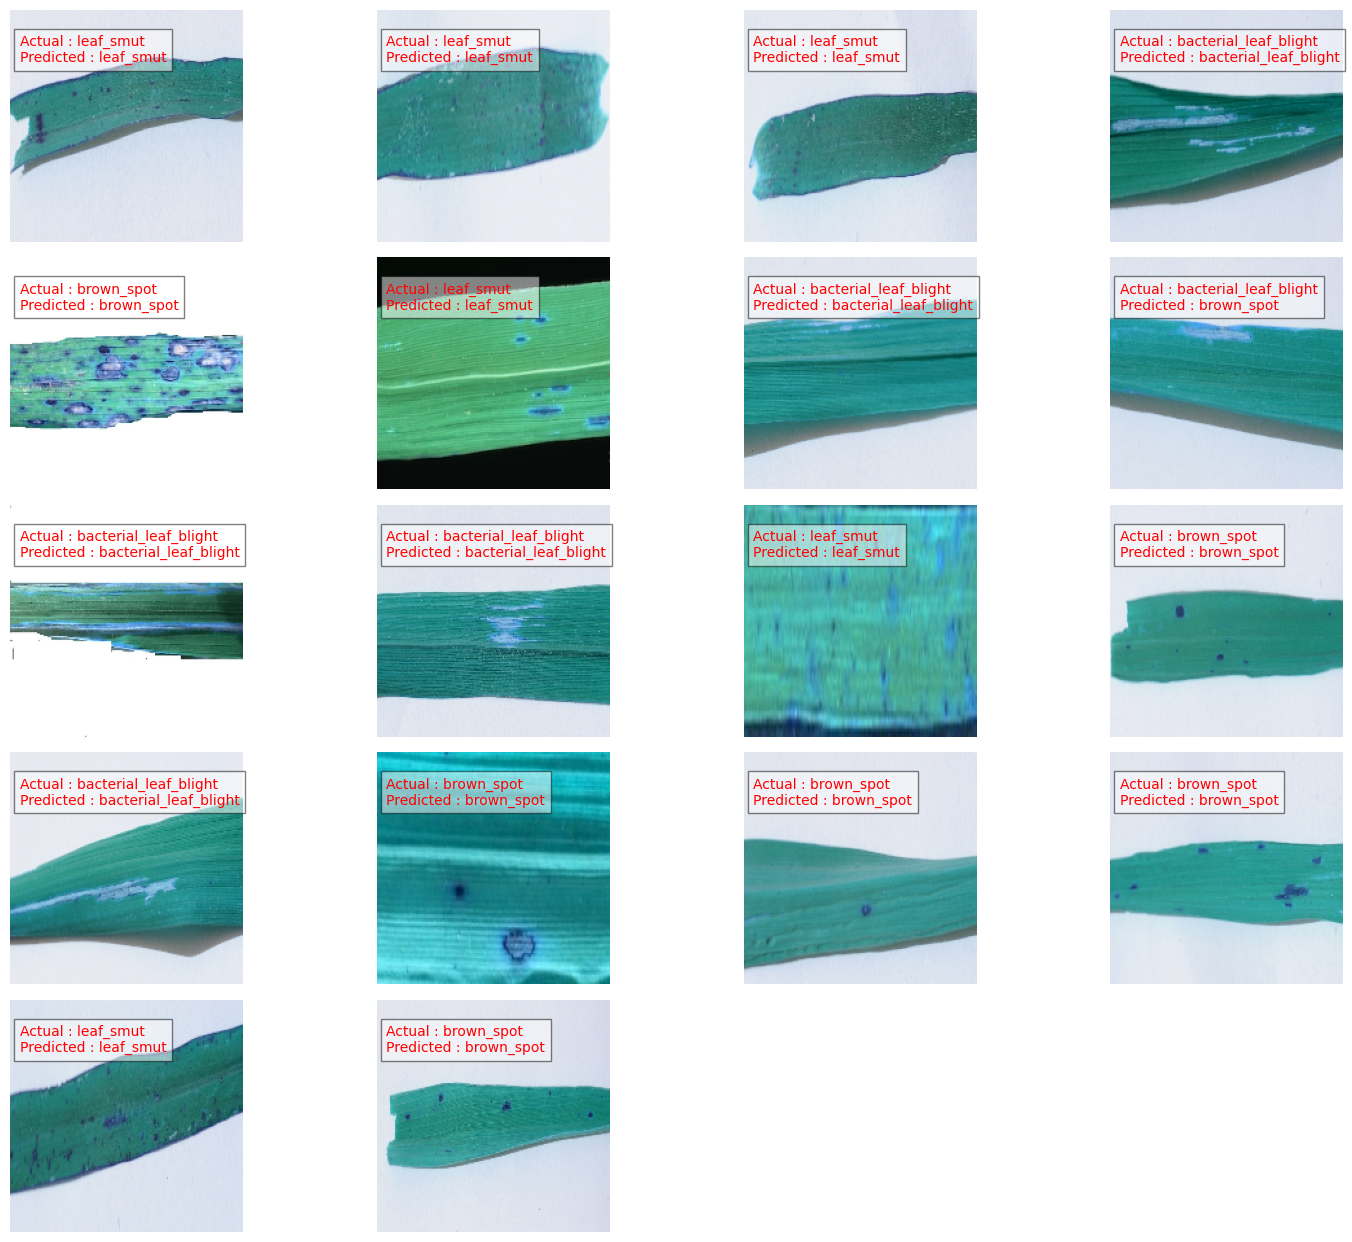

In [68]:
plt.figure(figsize=(15,15))
plotnumber = 1
for i in range(0, len(X_test)):
        ax = plt.subplot(6,4,plotnumber)
        plt.axis('off')
        plt.imshow(X_test[i])
        plt.text(7,40, "Actual : " + list(disease_label.keys())[list(disease_label.values()).index(y_test[i])] + "\n"
        + "Prediction : " + list(disease_label.keys())[list(disease_label.values()).index(y_pred_class[i])],
        color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.5))
        plotnumber += 1
plt.tight_layout()
plt.show() 


## CHALLENGES FACED DURING THE PROJECT

* The first and most difficult challenge that we faced was lack of domain knowledge,Without domain knowledge we cannot address the relevent features correctly..For this we reffered plenty of websites to understand the rice leaf diesases
* This is the first project that we are working with CNN,Keras and Tensorflow,it feels difficult at the first time and then reffered a study materails,youtube vedios and websites like medium,geekforgeeks,towards datascience etc,....
* There is lot of syntax and logical errors while working with images and most of them resolved through stackoverflow
* Lot of time taken for model creation and we worked first in jupiter notebook(lot of experimental test are necessary) and then we used google collab to process more fast.(later integrated run with jupiter notebook)
* Less number samples for training is the another challenge,for deep learning for a better model we need sufficient samples to train and this can be solved by data augmentation
* There is also experimented some techniques that didnt went as expected.We used cut mixgenrator,Random insersion,K fold cross optimization etc and result didnt generated as expected
* Data overfitting was the another main problem, we reduced the epochs,batch size and optimised the parameters keras tuner
* Lack of knowledge regarding openCV,Random search and augmentation takes lot of time,this was resolved by reffering medium website and stackoverflow
* After data augmentation size of data get increased and it was very difficult to manage,we created a batch 16 images for training and it results easy processing
